In [65]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

companies = pd.read_csv('companies.csv')
titles = pd.read_csv('titles.csv')
skills = pd.read_csv('skills.csv')
functions = pd.read_csv('functions.csv')
del titles['industry']
del skills['industry']
del companies['industry']
del functions['industry']

functions
companies

,sub_industry,company,no_people,growth_rate,job_posts,attrition_rate
0,IT Software,Microsoft,1667,0.023,53,0.119
1,IT Software,SAP,1450,-0.029,9,0.09
2,IT Software,Autodesk,660,0.058,12,0.062
3,IT Software,VMware,441,0.04,94,0.143
4,IT Software,Symantec,270,-0.137,0,0.196
...,...,...,...,...,...,...
1095,CaaS,NTUC Club,1,0.00%,0,NaN
1096,CaaS,TechDirect,1,0.00%,0,NaN
1097,CaaS,SpaceDC,1,0.00%,0,NaN
1098,CaaS,CapitaLand,1,0.00%,0,NaN


In [85]:
lst = companies.columns.tolist()

def get_stripped(df):
    lst = df.columns.tolist()
    for i in lst:
        df[str(i)] = df[str(i)].astype(str).str.replace('[#,@,&,%]','') 
    return df

df = get_stripped(companies)
df['no_people'] = df['no_people'].astype(int)
df['growth_rate'] = df['growth_rate'].astype(float)
df['job_posts'] = df['job_posts'].astype(float)
df['attrition_rate'] = df['attrition_rate'].astype(float)

titles = get_stripped(titles)
titles['no_titles_professionals'] = titles['no_titles_professionals'].astype(float)
titles['percent_total_titles'] = titles['percent_total_titles'].astype(float)
titles['percent_female_titles'] = titles['percent_female_titles'].astype(float)


skills = get_stripped(skills)
skills['growth_skills'] = skills['growth_skills'].astype(float)
skills['skills_professionals'] = skills['skills_professionals'].astype(float)
skills['job_posts_skills'] = skills['job_posts_skills'].astype(float)


functions = get_stripped(functions)
functions['growth_functions'] = functions['growth_functions'].astype(float)
functions['professionals_functions'] = functions['professionals_functions'].astype(float)
functions['job_posts'] = functions['job_posts'].astype(float)


<AxesSubplot:xlabel='sub_industry', ylabel='growth_functions'>

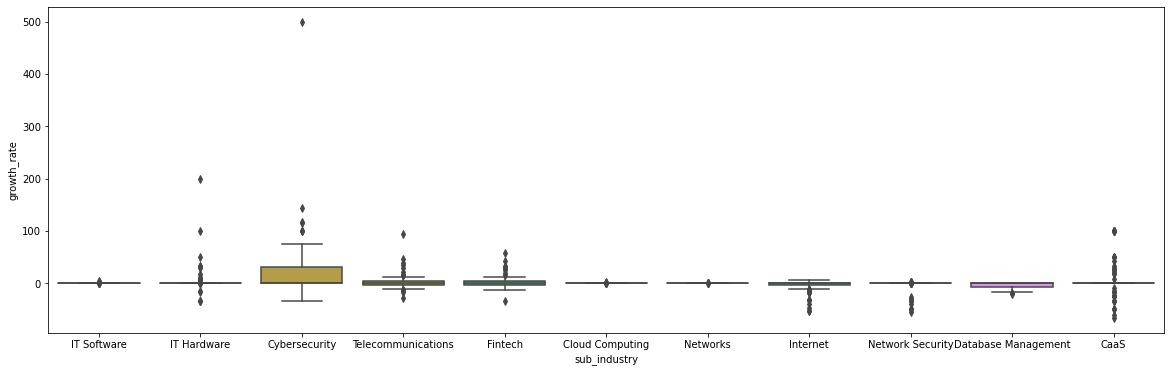

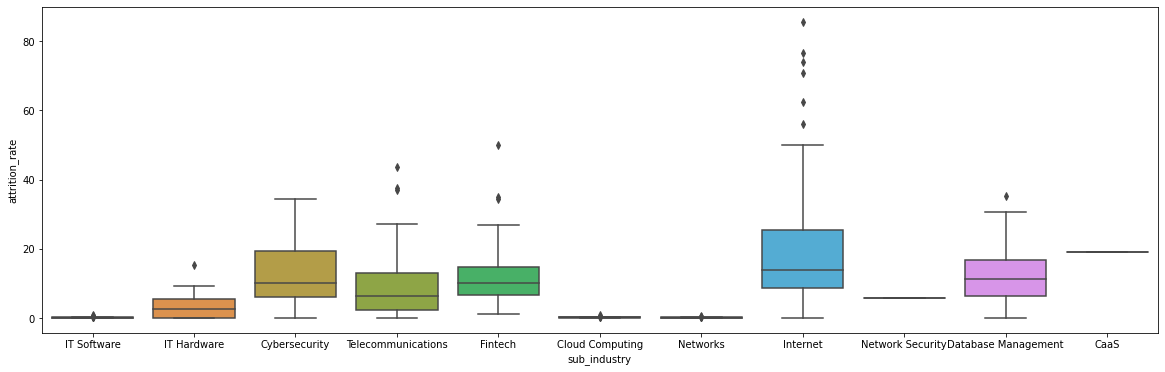

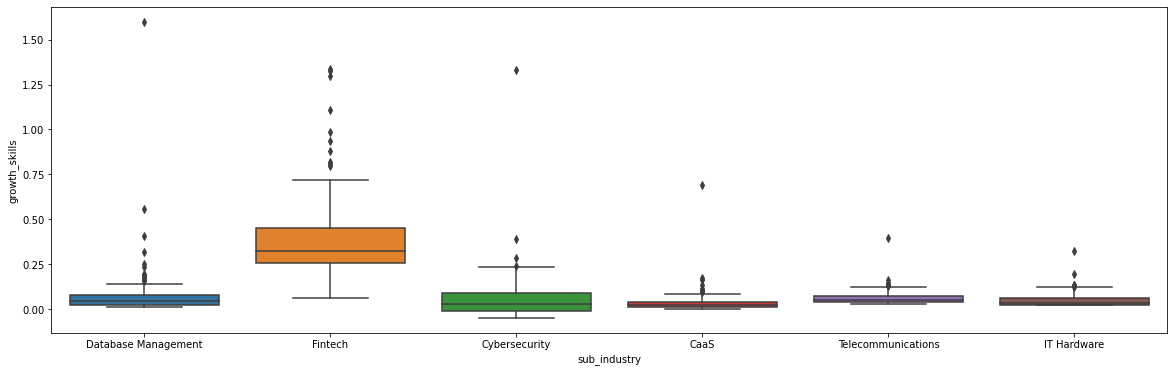

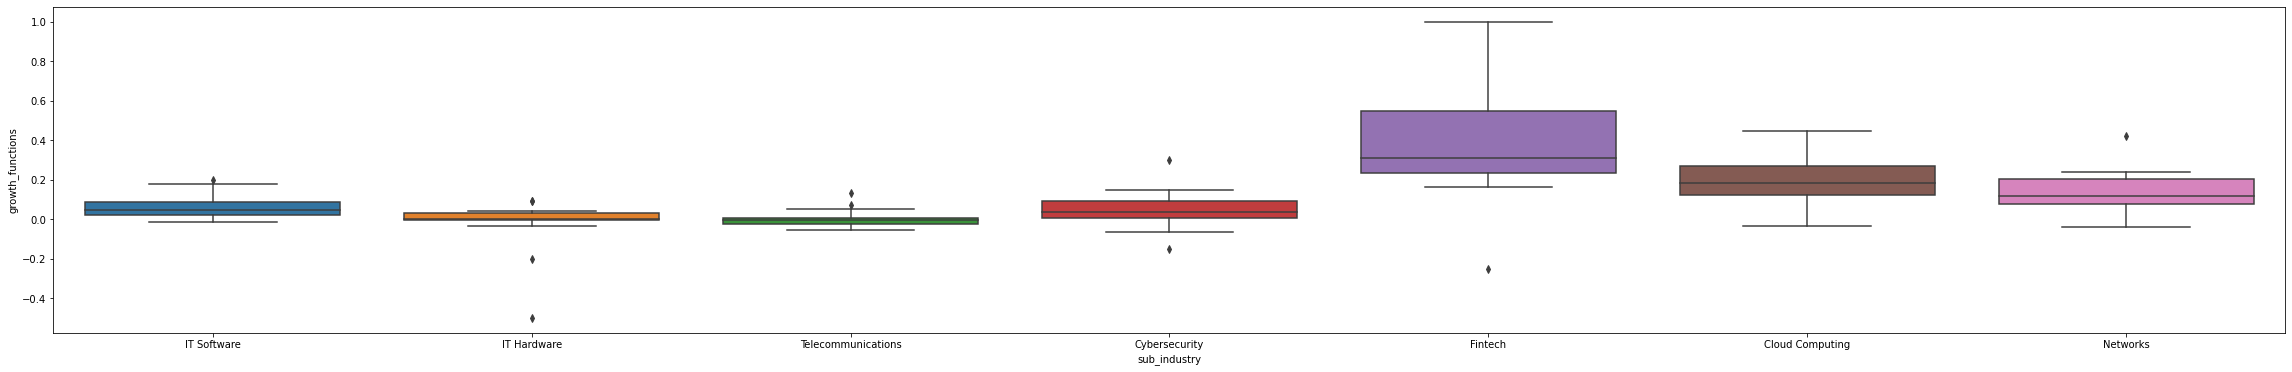

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.boxplot(x="sub_industry", y="growth_rate", data=companies)

plt.figure(figsize=(20, 6))
sns.boxplot(x="sub_industry", y="attrition_rate", data=companies)

plt.figure(figsize=(20, 6))
sns.boxplot(x="sub_industry", y="growth_skills", data=skills)

plt.figure(figsize=(40, 6))
sns.boxplot(x="sub_industry", y="growth_functions", data=functions)




In [77]:
label = LabelEncoder()
df['company'] = label.fit_transform(df['company'])
titles['titles'] = label.fit_transform(titles['titles'])
skills['skills'] = label.fit_transform(skills['skills'])
df['sub_industry'] = label.fit_transform(df['sub_industry'])
skills['sub_industry'] = label.fit_transform(skills['sub_industry'])
titles['sub_industry'] = label.fit_transform(titles['sub_industry'])



In [78]:
#create a new column for the age group
labels = [0, 1]
df['growth_rate_y'] = pd.cut(df['growth_rate'], bins=2, labels=labels)
df['growth_rate_y']
df['company'].unique()
df = df.dropna()
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)




<AxesSubplot:>

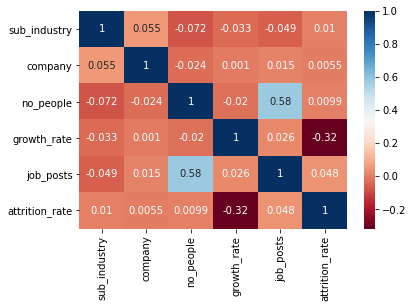

In [79]:
import seaborn as sns
sns.heatmap(train.corr(), annot=True, cmap="RdBu")

<AxesSubplot:>

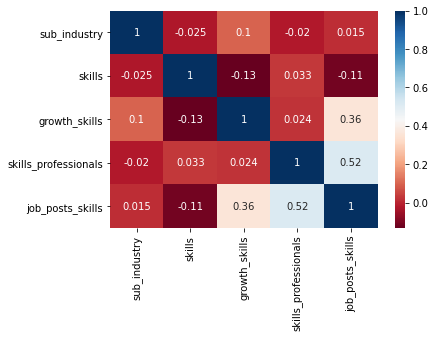

In [81]:
sns.heatmap(skills.corr(), annot=True, cmap="RdBu")

Loading BokehJS ...

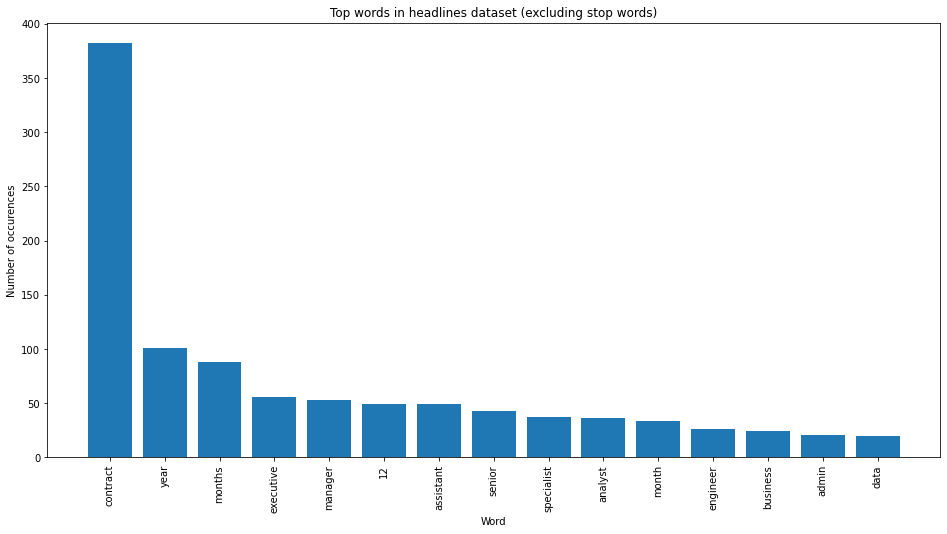

In [139]:

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
plt.ion()

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from collections import Counter

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])


text = pd.read_excel('it_contract_save.xlsx')
data = text['job_title']

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


In [173]:
data = pd.read_excel('it_contract_save.xlsx')

data.head()

,url,job_title,industry,function,company_name,inferred_country,post_date,job_description
0,https://www.glassdoor.co.in/job-listing/contra...,Contract Securities Operations Staff @ Raffles...,Banking,Logistics,Success Human Resource Centre Pte Ltd,Singapore,2021-02-02,Contract Raffles Place Office Hours $2000 - $2...
1,https://www.glassdoor.co.in/job-listing/hr-gen...,"HR Generalist (six-month contract, convertible)",IT,HR,Robert Walters,Singapore,2021-02-02,A global professional services company located...
2,https://www.glassdoor.co.in/job-listing/securi...,Security Project Manager (1 yr contract),IT,IT,Hays,Singapore,2021-02-02,Your new company This well-regarded MNC is loo...
3,https://www.glassdoor.co.in/job-listing/hr-bus...,HR Business Partner (1-yr contract with Global...,HR,HR,THAME'S HUMAN RESOURCES PTE. LTD.,Singapore,2021-02-02,[CANDIDATES WHO REQUIRE WORK PASSES NEED NOT A...
4,https://www.glassdoor.co.in/job-listing/contra...,Contract Product Development Analyst (VBA/SQL)...,Banking,IT,RECRUIT EXPRESS PTE LTD,Singapore,2021-02-02,[CANDIDATES WHO REQUIRE WORK PASSES NEED NOT A...


In [195]:
import spacy
import networkx as nx                        # a really useful network analysis library
import matplotlib.pyplot as plt
# from networkx.algorithms import community   # not used, yet... 
import datetime                              # access to %%time, for timing individual notebook cells
import os
from spacy.lang.en import English

nlp = spacy.load('en_core_web_lg')           # A more detailed model (with higher-dimension word vectors) - 13s to load, normally 
plt.rcParams['figure.figsize'] = [10, 10]  # makes the output plots large enough to be useful

tokens = []
lemma = []
pos = []
parsed_doc = [] 
col_to_parse = 'job_title'

x = data

x = x.drop_duplicates(subset = col_to_parse)

for doc in nlp.pipe(x[col_to_parse].astype('unicode').values, batch_size=50):
    if doc.is_parsed:
        parsed_doc.append(doc)
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

x['parsed_doc'] = parsed_doc
x['comment_tokens'] = tokens
x['comment_lemma'] = lemma
x['pos_pos'] = pos


In [196]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stopwords: %d' % len(stop_words))

Number of stopwords: 326


In [197]:
raw_G = nx.Graph() # undirected
n = 0

for i in x['parsed_doc']:        # sure, it's inefficient, but it will do
    for j in x['parsed_doc']:
        if i != j:
            if not (raw_G.has_edge(j, i)):
                sim = i.similarity(j)
                raw_G.add_edge(i, j, weight = sim)
                n = n + 1

print(raw_G.number_of_nodes(), "nodes, and", raw_G.number_of_edges(), "edges created.")


304 nodes, and 46056 edges created.


In [198]:
edges_to_kill = []
min_wt = 0.94      # this is our cutoff value for a minimum edge-weight 

for n, nbrs in raw_G.adj.items():
    #print("\nProcessing origin-node:", n, "... ")
    for nbr, eattr in nbrs.items():
        # remove edges below a certain weight
        x = eattr['weight']
        if x < min_wt: 
            # print('(%.3f)' % (data))  
            # print('(%d, %d, %.3f)' % (n, nbr, data))  
            #print("\nNode: ", n, "\n <-", data, "-> ", "\nNeighbour: ", nbr)
            edges_to_kill.append((n, nbr)) 
            
print("\n", len(edges_to_kill) / 2, "edges to kill (of", raw_G.number_of_edges(), "), before de-duplicating")



 46006.0 edges to kill (of 46056 ), before de-duplicating


In [199]:
for u, v in edges_to_kill:
    if raw_G.has_edge(u, v):   # catches (e.g.) those edges where we've removed them using reverse ... (v, u)
        raw_G.remove_edge(u, v)


In [200]:
strong_G = raw_G
print(strong_G.number_of_edges())


50


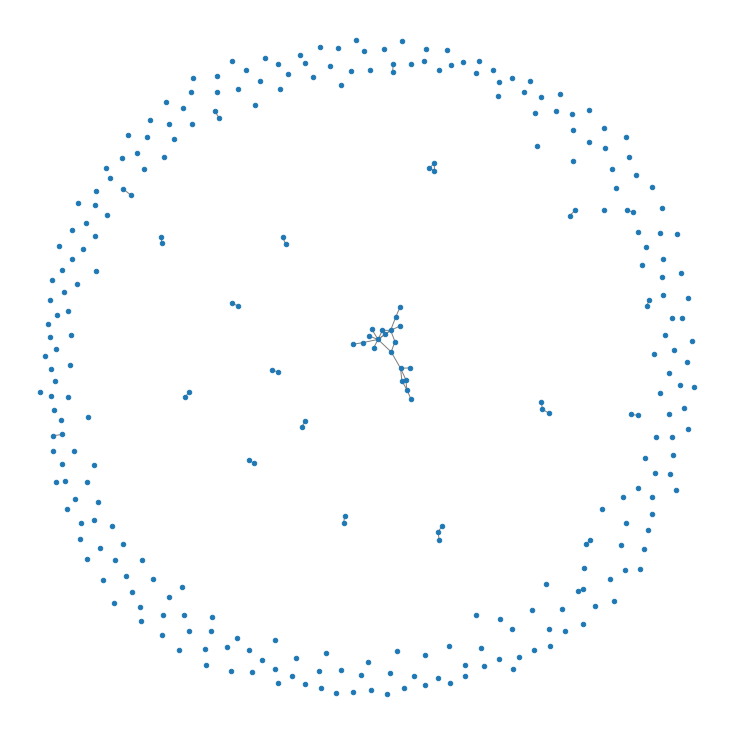

In [201]:
nx.draw(strong_G, node_size=20, edge_color='gray')


In [202]:
strong_G.remove_nodes_from(list(nx.isolates(strong_G)))


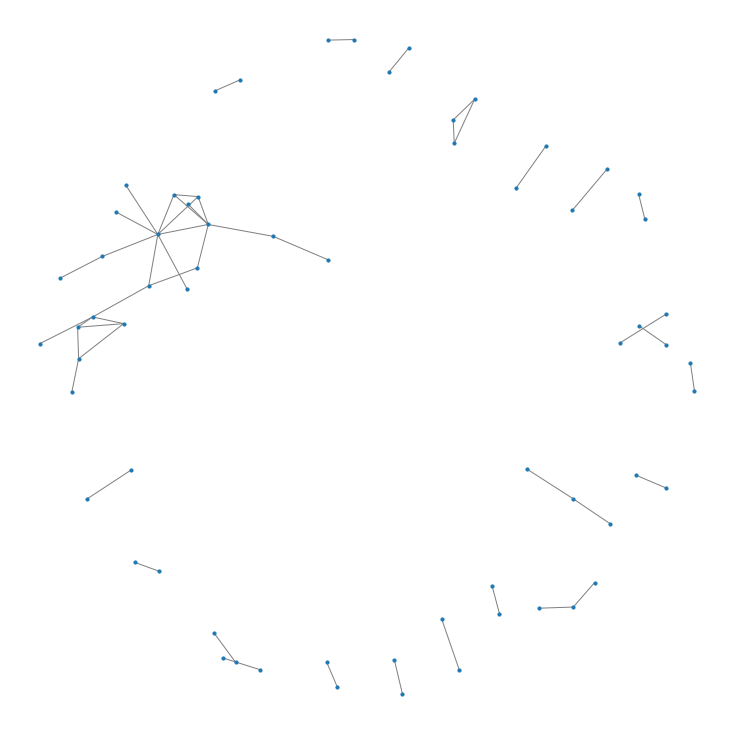

In [203]:
from math import sqrt
count = strong_G.number_of_nodes()
equilibrium = 10 / sqrt(count)    # default for this is 1/sqrt(n), but this will 'blow out' the layout for better visibility
pos = nx.fruchterman_reingold_layout(strong_G, k=equilibrium, iterations=300)



nx.draw(strong_G, pos=pos, node_size=10, edge_color='gray')


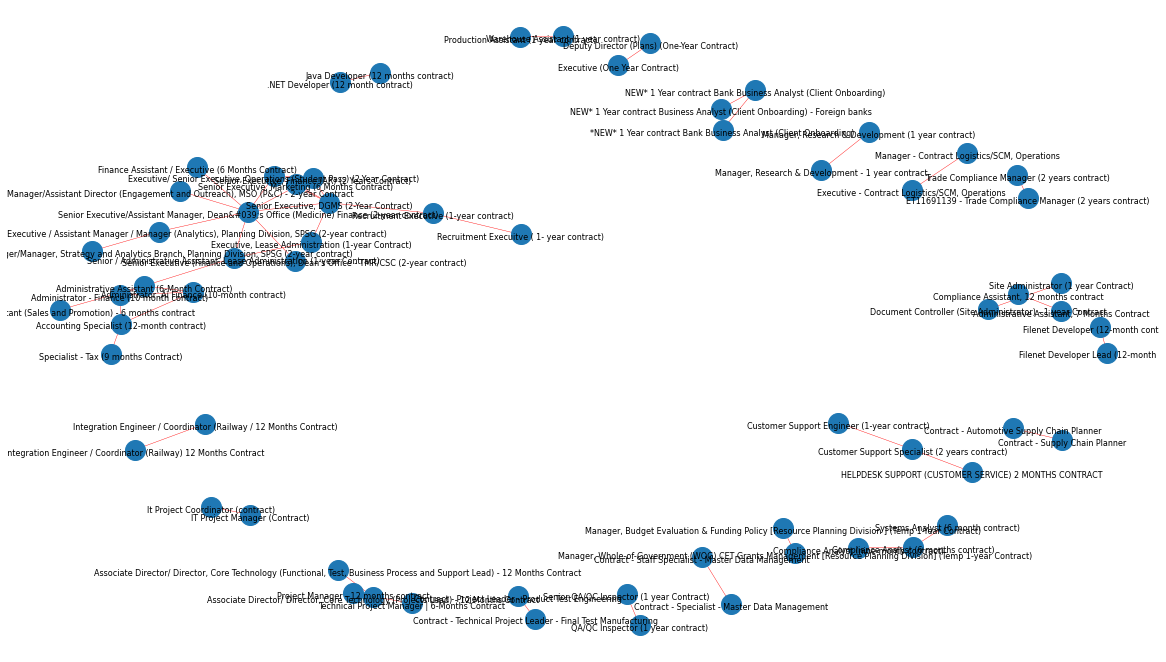

In [235]:
plt.rcParams['figure.figsize'] = [16, 9]  # a better aspect ratio for labelled nodes

nx.draw(strong_G, pos, font_size=200,width=0.4, node_size=400, edge_color='red', with_labels=False)
for p in pos:  # raise positions of the labels, relative to the nodes
    pos[p][1] -= 0.01
nx.draw_networkx_labels(strong_G, pos, font_size=8, font_color='black')

plt.ion()

plt.show()